# Timeseries Data Analysis

Kaggle Dataset used Sunspot Dataset - https://www.kaggle.com/datasets/robervalt/sunspots?select=Sunspots.csv

## Load the data.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

# Load the dataset
df_sunspots = pd.read_csv('/content/gdrive/MyDrive/DM-Assignment-Dataset/Sunspots.csv')

# Display the first few rows of the dataset
df_sunspots.head()


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


## Check for missing values.

In [ ]:
# Check for missing values in the dataset
missing_values = df_sunspots.isnull().sum()

missing_values


Unnamed: 0                           0
Date                                 0
Monthly Mean Total Sunspot Number    0
dtype: int64

The dataset does not contain any missing values in any of the columns.

## Visualize distributions of key features

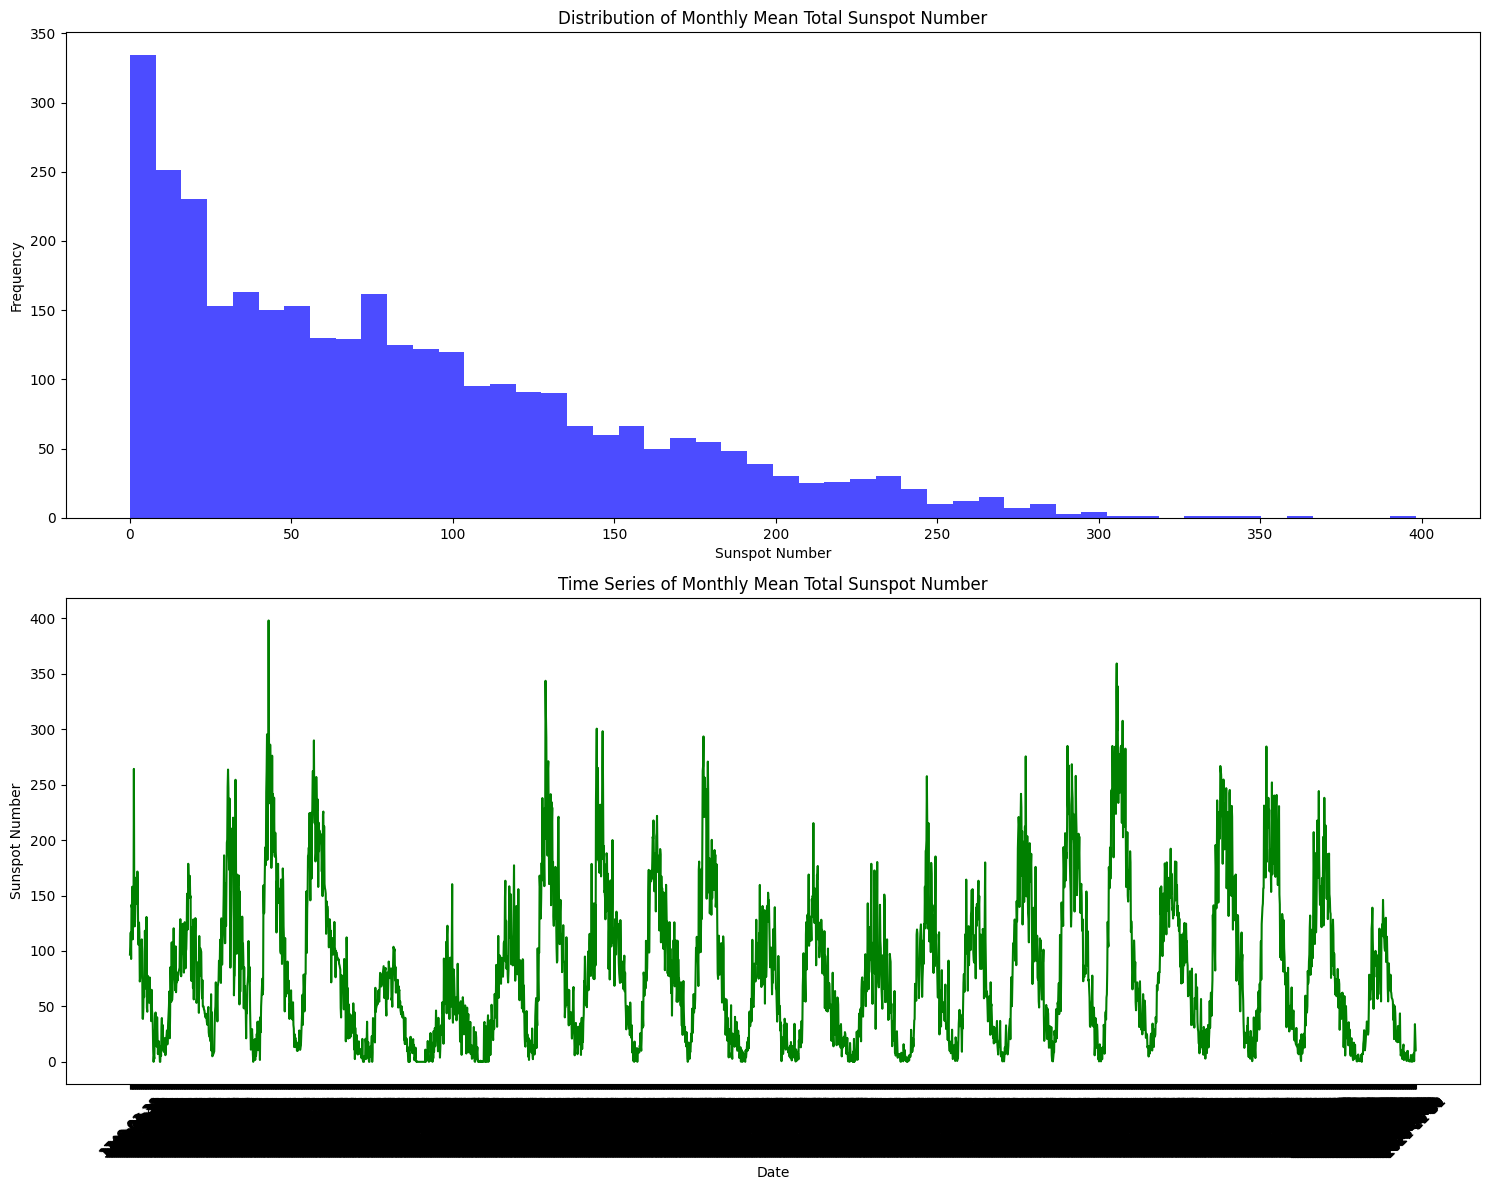

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot histogram of Monthly Mean Total Sunspot Number
ax[0].hist(df_sunspots['Monthly Mean Total Sunspot Number'], bins=50, color='blue', alpha=0.7)
ax[0].set_title('Distribution of Monthly Mean Total Sunspot Number')
ax[0].set_xlabel('Sunspot Number')
ax[0].set_ylabel('Frequency')

# Plot time series of Monthly Mean Total Sunspot Number
ax[1].plot(df_sunspots['Date'], df_sunspots['Monthly Mean Total Sunspot Number'], color='green')
ax[1].set_title('Time Series of Monthly Mean Total Sunspot Number')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Sunspot Number')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


Here's a summary of the visualizations:

1. Distribution of Monthly Mean Total Sunspot Number:
* The histogram shows that there are many months with a low sunspot number, and the frequency decreases as the sunspot number increases.
* There are some months with exceptionally high sunspot numbers, but they are less frequent.
2. Time Series of Monthly Mean Total Sunspot Number:
* The time series plot shows a cyclical pattern in sunspot numbers over the years. This is consistent with the well-known 11-year solar cycle.
* There are peaks and troughs, indicating periods of high and low solar activity.

## Check for correlations between features

In [ ]:
# Compute the correlation matrix
correlation_matrix = df_sunspots.corr()

correlation_matrix


<ipython-input-7-b7ceaeeed824>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_sunspots.corr()


,Unnamed: 0,Monthly Mean Total Sunspot Number
Unnamed: 0,1.0000,0.0361
Monthly Mean Total Sunspot Number,0.0361,1.0000


The correlation matrix shows:

* The correlation between Unnamed: 0 (which seems to be an index or identifier) and Monthly Mean Total Sunspot Number is approximately 0.0361. This value is close to 0, indicating that there's a very weak linear relationship between these two features.

Considering the nature of the dataset, this result is expected, as the identifier or index column wouldn't have a meaningful correlation with the sunspot numbers.

## Use auto EDA tools like sweetviz for detailed reports

In [ ]:
!pip install sweetviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 58.8 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv


# Generate the Sweetviz report
report = sv.analyze(df_sunspots)

# Save the report to an HTML file
report.show_html("output_report.html")


                                             |          | [  0%]   00:00 -> (? left)

Report output_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


The Sweetviz report will provide you with detailed visualizations and statistics about each feature in your dataset, comparisons between features, and more.

## Data Preprocessing

a) Cleaning:
The first step in data preprocessing is cleaning the data. This involves handling missing values, removing duplicates, and dealing with outliers.

1. Handle Missing Values:
As we determined earlier, the dataset doesn't have any missing values. So, we can skip this step.

2. Remove Duplicates:
Let's check for duplicate rows in the dataset and remove them if any exist.

In [ ]:
# Remove duplicate rows from the dataset
initial_row_count = df_sunspots.shape[0]
df_sunspots.drop_duplicates(inplace=True)
remaining_row_count = df_sunspots.shape[0]

# Calculate the number of rows removed
rows_removed = initial_row_count - remaining_row_count

rows_removed


0

There were no duplicate rows in the dataset, so no rows were removed.

## Handle Outliers:

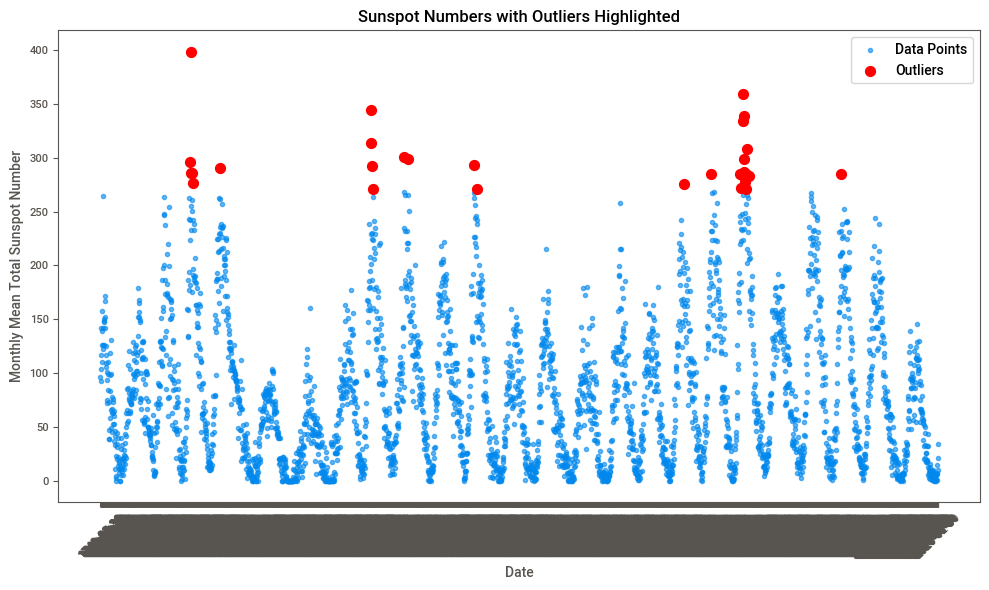

31

In [ ]:
# Calculate Q1, Q3, and IQR for the Monthly Mean Total Sunspot Number column
Q1 = df_sunspots['Monthly Mean Total Sunspot Number'].quantile(0.25)
Q3 = df_sunspots['Monthly Mean Total Sunspot Number'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_sunspots[(df_sunspots['Monthly Mean Total Sunspot Number'] < lower_bound) |
                       (df_sunspots['Monthly Mean Total Sunspot Number'] > upper_bound)]

# Plotting the data and outliers
plt.figure(figsize=(10, 6))
plt.scatter(df_sunspots['Date'], df_sunspots['Monthly Mean Total Sunspot Number'], label="Data Points", alpha=0.6)
plt.scatter(outliers['Date'], outliers['Monthly Mean Total Sunspot Number'], color='red', label="Outliers", s=50)
plt.title('Sunspot Numbers with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return the number of outliers detected
outliers_count = outliers.shape[0]
outliers_count


The red points in the plot above represent the outliers in the "Monthly Mean Total Sunspot Number" column. We detected a total of 31 outliers.

At this point, we can either remove these outliers or replace them with other values (imputation). Removing outliers can result in loss of information, especially if they represent genuine extreme values. On the other hand, imputing outliers can introduce bias.

## Feature Engineering:

1. Create New Features Based on Domain Knowledge:
Given the dataset's nature (time series data about sunspots), we can extract time-based features from the Date column, such as year, month, and a possible cyclical encoding for the month to capture the seasonality.

2. Convert Categorical Variables to Numerical:
In our dataset, the only potential categorical variable is the Date column, which we'll handle in the first step. Thus, encoding isn't necessary for other columns.

3. Normalize/Standardize Numerical Features:
Standardizing data can be essential for some machine learning algorithms. We can standardize the "Monthly Mean Total Sunspot Number" column.

In [ ]:
import numpy as np

# Convert the 'Date' column to datetime format
df_sunspots['Date'] = pd.to_datetime(df_sunspots['Date'])

# Extract year and month from the 'Date' column
df_sunspots['Year'] = df_sunspots['Date'].dt.year
df_sunspots['Month'] = df_sunspots['Date'].dt.month

# Create cyclical features for month to capture seasonality
df_sunspots['Month_sin'] = np.sin(2 * np.pi * df_sunspots['Month'] / 12)
df_sunspots['Month_cos'] = np.cos(2 * np.pi * df_sunspots['Month'] / 12)

# Drop the original 'Month' column as we have its cyclical encoding
df_sunspots.drop('Month', axis=1, inplace=True)

# Display the modified dataset with new features
df_sunspots.head()


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,Year,Month_sin,Month_cos
0,0,1749-01-31,96.7,1749,0.500000,8.660254e-01
1,1,1749-02-28,104.3,1749,0.866025,5.000000e-01
2,2,1749-03-31,116.7,1749,1.000000,6.123234e-17
3,3,1749-04-30,92.8,1749,0.866025,-5.000000e-01
4,4,1749-05-31,141.7,1749,0.500000,-8.660254e-01


1. Year: Extracted year from the Date column.
2. Month_sin and Month_cos: Cyclical encodings for the month to capture seasonality.

Let's proceed with this standardization.​

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the "Monthly Mean Total Sunspot Number" column
df_sunspots['Monthly Mean Total Sunspot Number'] = scaler.fit_transform(df_sunspots[['Monthly Mean Total Sunspot Number']])

# Display the modified dataset with standardized features
df_sunspots.head()


,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,Year,Month_sin,Month_cos
0,0,1749-01-31,0.219821,1749,0.500000,8.660254e-01
1,1,1749-02-28,0.331785,1749,0.866025,5.000000e-01
2,2,1749-03-31,0.514464,1749,1.000000,6.123234e-17
3,3,1749-04-30,0.162366,1749,0.866025,-5.000000e-01
4,4,1749-05-31,0.882767,1749,0.500000,-8.660254e-01


To summarize the feature engineering steps:

1. Extracted the year from the Date column.
2. Created cyclical features for the month to capture seasonality.
3. Standardized the "Monthly Mean Total Sunspot Number" column.

## Feature Selection:

In [ ]:
# Compute correlation of other features with "Monthly Mean Total Sunspot Number"
correlation_with_sunspots = df_sunspots.corr()['Monthly Mean Total Sunspot Number'].drop('Monthly Mean Total Sunspot Number')

correlation_with_sunspots


<ipython-input-17-8b9974bd23ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_sunspots = df_sunspots.corr()['Monthly Mean Total Sunspot Number'].drop('Monthly Mean Total Sunspot Number')


Unnamed: 0    0.036100
Year          0.036059
Month_sin    -0.011406
Month_cos    -0.010021
Name: Monthly Mean Total Sunspot Number, dtype: float64

All these features have a very weak correlation with the "Monthly Mean Total Sunspot Number", which is expected since the primary variance in our dataset is time-based.

Given this analysis, no features stand out as being particularly redundant or irrelevant, so we might not need to drop any features based on correlation alone.

## Clustering and Anomaly Detection:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


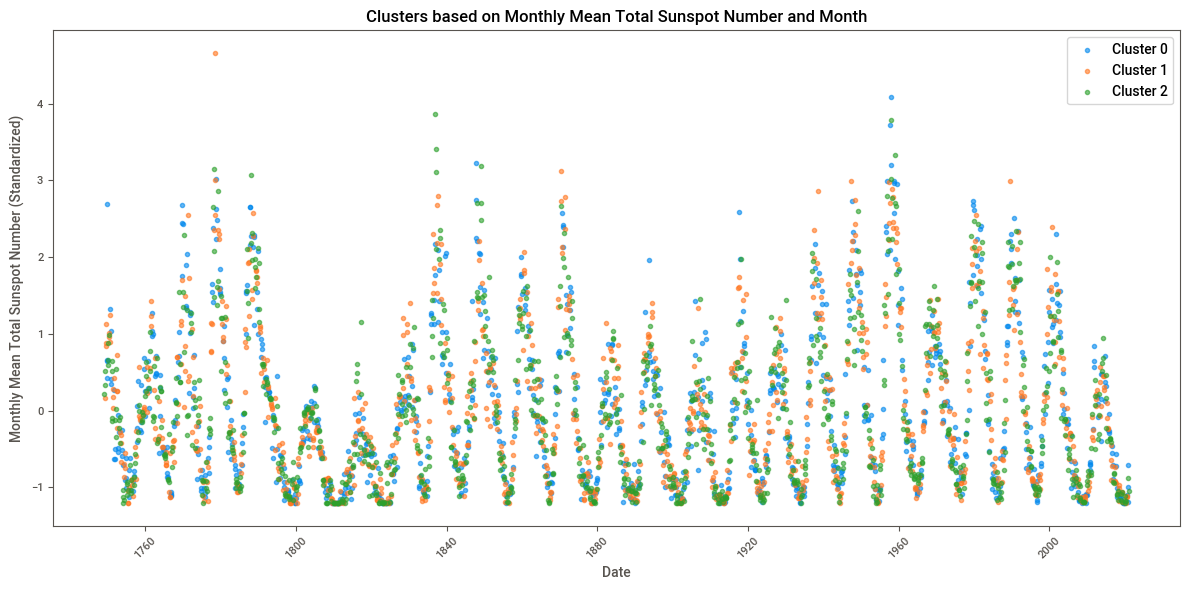

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Features to be used for clustering
features_for_clustering = ["Monthly Mean Total Sunspot Number", "Month_sin", "Month_cos"]

# Scale the features to range [0, 1] for better clustering results
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_sunspots[features_for_clustering])

# Use KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_sunspots['Cluster'] = kmeans.fit_predict(scaled_data)

# Plotting the clusters
plt.figure(figsize=(12, 6))
for cluster_num in range(3):
    subset = df_sunspots[df_sunspots['Cluster'] == cluster_num]
    plt.scatter(subset['Date'], subset['Monthly Mean Total Sunspot Number'], label=f"Cluster {cluster_num}", alpha=0.6)

plt.title('Clusters based on Monthly Mean Total Sunspot Number and Month')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number (Standardized)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot above shows the data points clustered into three groups based on the "Monthly Mean Total Sunspot Number" and cyclical month features (Month_sin and Month_cos). Different colors represent different clusters.

###  Anomaly Detection

1. Isolation Forest:

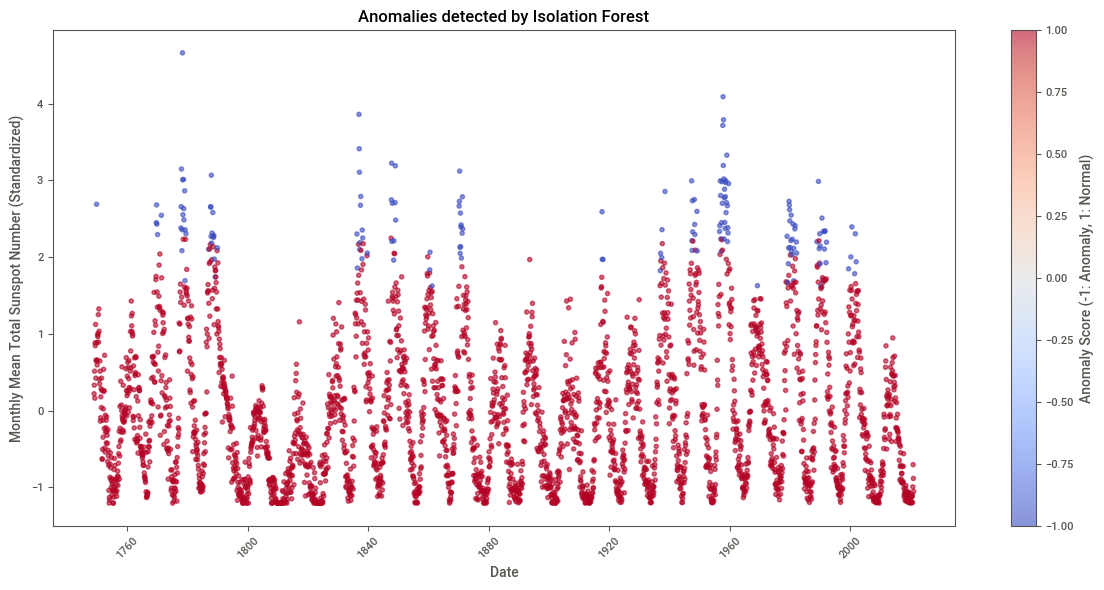

164

In [ ]:
from sklearn.ensemble import IsolationForest

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% of data is considered as outliers
df_sunspots['Anomaly_IF'] = iso_forest.fit_predict(scaled_data)

# Plotting the anomalies detected by Isolation Forest
plt.figure(figsize=(12, 6))
plt.scatter(df_sunspots['Date'], df_sunspots['Monthly Mean Total Sunspot Number'],
            c=df_sunspots['Anomaly_IF'], cmap='coolwarm', label="Data Points", alpha=0.6)

plt.title('Anomalies detected by Isolation Forest')
plt.xlabel('Date')
plt.ylabel('Monthly Mean Total Sunspot Number (Standardized)')
plt.colorbar(label='Anomaly Score (-1: Anomaly, 1: Normal)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Return the number of anomalies detected
anomalies_count_IF = df_sunspots[df_sunspots['Anomaly_IF'] == -1].shape[0]
anomalies_count_IF


The plot above visualizes the anomalies detected by the Isolation Forest. Data points highlighted in darker colors are considered anomalies. The Isolation Forest detected 164 anomalies in the dataset.

## Model Building

###  Split data into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_sunspots[["Year", "Month_sin", "Month_cos"]]
y = df_sunspots["Monthly Mean Total Sunspot Number"]

# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((2612, 3), (653, 3))

###  AutoML platforms

In [ ]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.1 MB/s et

In [ ]:
from pycaret.regression import compare_models,setup,tune_model,
setup(data=df_sunspots, target='Monthly Mean Total Sunspot Number')


,Description,Value
0,Session id,3090
1,Target,Monthly Mean Total Sunspot Number
2,Target type,Regression
3,Original data shape,"(3265, 8)"
4,Transformed data shape,"(3265, 10)"
5,Transformed train set shape,"(2285, 10)"
6,Transformed test set shape,"(980, 10)"
7,Numeric features,6
8,Date features,1
9,Preprocess,True


In [ ]:
best_model = compare_models()
best_model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.2415,0.1089,0.3294,0.8872,0.1756,1.5591,1.6130
et,Extra Trees Regressor,0.2569,0.1232,0.3504,0.8723,0.1830,1.5873,0.7570
lightgbm,Light Gradient Boosting Machine,0.2742,0.1308,0.3608,0.8647,0.1904,1.7165,0.2640
knn,K Neighbors Regressor,0.2590,0.1328,0.3638,0.8631,0.1850,1.5766,0.0590
xgboost,Extreme Gradient Boosting,0.2743,0.1414,0.3747,0.8533,0.1921,1.8478,0.1370
dt,Decision Tree Regressor,0.2920,0.1608,0.4007,0.8331,0.2016,1.8003,0.0760
gbr,Gradient Boosting Regressor,0.4476,0.3139,0.5588,0.6779,0.3193,1.2017,0.6740
ada,AdaBoost Regressor,0.6822,0.6519,0.8063,0.3313,0.4904,1.3434,0.1370
br,Bayesian Ridge,0.6841,0.6818,0.8243,0.2994,0.4646,1.3695,0.0880
ridge,Ridge Regression,0.6842,0.6818,0.8243,0.2994,0.4642,1.3722,0.0460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

RandomForestRegressor(n_jobs=-1, random_state=3090)

In [ ]:
from pycaret.regression import tune_model,finalize_model,predict_model
tuned_model = tune_model(best_model)
final_model = finalize_model(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6254,0.5889,0.7674,0.4406,0.4602,1.1768
1,0.7003,0.6986,0.8358,0.3622,0.4785,1.1313
2,0.6340,0.5682,0.7538,0.4284,0.4469,1.7268
3,0.6619,0.6189,0.7867,0.4080,0.4721,1.1367
4,0.7041,0.6860,0.8282,0.3094,0.4894,1.0891
5,0.5504,0.4292,0.6551,0.4181,0.3936,1.1480
6,0.5989,0.5174,0.7193,0.3815,0.4315,1.5828
7,0.6778,0.6527,0.8079,0.2888,0.4796,1.1451
8,0.6526,0.6034,0.7768,0.4418,0.4467,1.1052


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Build ensemble models

1. Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model performance
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

rf_rmse


0.3886486146389399

2. Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model performance
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

gb_rmse


0.5990053010730013

3. Stacking

Lastly, let's build a Stacking ensemble. For this, we'll use the Random Forest and Gradient Boosting models as base models and a linear regression model as the meta-model.​

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
base_models = [
    ('RandomForest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Initialize the Stacking Regressor with the base models and a linear meta-model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Predict on the test set
stacking_predictions = stacking_model.predict(X_test)

# Evaluate the model performance
stacking_mse = mean_squared_error(y_test, stacking_predictions)
stacking_rmse = np.sqrt(stacking_mse)

stacking_rmse


0.3856932122914147

## Conclusion

The Stacking ensemble provided the best performance among the three.